In [8]:
import torch
from train import Trainer
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
def test(model, input_text):
    """
    Test the model by providing a sequence of text and predicting the next character.
    """
    model.model.eval()
    with torch.no_grad():

        input_indices = [model.dataset.stoi[char] for char in input_text]
        x_test = torch.tensor(input_indices)
        
        output = model.model(x_test) 

        # predicted_index = torch.argmax(output[-1,:]).item()  
        proba = torch.softmax(output[-1, :], dim=-1)
        predicted_index = torch.multinomial(proba, 1).item()
        
        predicted_letter = [k for k, v_ in model.dataset.stoi.items() if v_ == predicted_index]

    
    return predicted_letter

100%|██████████| 50/50 [00:50<00:00,  1.02s/it]


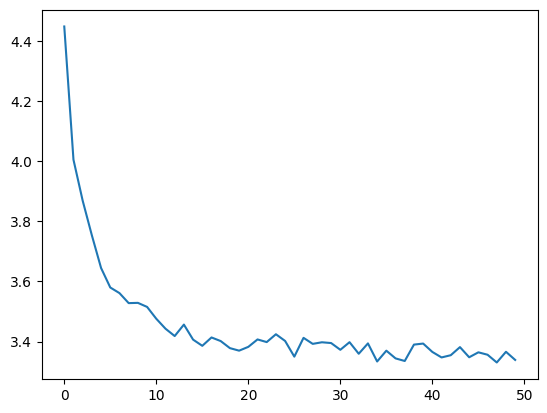

In [ ]:
train = Trainer("shakespeare-data.txt", 128, 768, 128, 8, 12, 0.001, 100)
train.run()
train.save_model(path="shakespeare-model.pth")

plt.plot(train.running_loss)
plt.show()

In [11]:
# train = Trainer("jul-data.txt", 128, 768, 128, 8, 12, 0.001, 20000)
# train.load_model()

phrase = "First "
phrase_final = "First "

for _ in range(1000) : 

    lettre = test(train, phrase)
    phrase_final += phrase[0]
    phrase = phrase[1:] + lettre[0]
    


print(phrase_final)

First First d!'!,'s!3mum!'d!B&!
V!!'d!!!mbj!&'s!Gw!!3sh!&&!!BxB!m!!v!m!',L'Bum!VBLVB!'s!&!!m!V!wn!!'!!!'s!pmm!BHh!'d!n!S'!!!my!!!&!J!!g!VV!&'d!'d!B!'!!3Bkm!'s!'d!3!!!'l!k!!!n'my'!Bm!k!!m!kn!&!m!'s!m!'d!&'jm!!g! mm!!
HJ!
V!'s!!!&ngGV's!!m!'s!Vk'm!!Vy!m!!&k!Vk's!!!kk,n!k'!GV&g!m!J!!VV! f!'d!!&!x!'!&!g!!'p'n!
JV's!kshm!GLUSVk,-km!!&!&!Bum!m!!!!'!
VLGBpy!B!'g!V&'V3!ug!m!!m!'d!w,!!'d! m!!!
Q!&m!
GBug!k's!k!!&!!y!!'3m!
Vk!l!m!J&n!&!-3!'pem!Vkmm!!GG!&!!!GSS&!!mp,GLmy!!v!!VV'd!Vg!!m!
B!Q,!!n!m!'l!!'d!m&!'sm!!!V!G&!kn!&'s!m!3m!!! &!!n!&3!m!'s!m,!&!!'mmy!QVVLGB!u!'s!m!x!JV!m!&!&'k'mx'm!!'d!m!&'d!3!Gm!&!!!'d!k!
B!!&k!!!un!&!'s!im!GB!'st!xmum!xv's!m!-VVakixVGBVak!x!!uk!&!'ppamm!'s!'d,VBx!!Bun!Qu!k!!m!'VGRV,!GLm!G&!!k'd'&ig!
J!!!'!&!!'x!&3!'m!'Bumbj!V!&!Gm!VOMg!!v!&KDGS3!!!x!!'3!!m!'s!m!3!!VGS&ff!mm!&GBimu!Dm!k!k!my!v!ks!!m!m!m!&v!!!'d!m!'d!!!K!!G'd!VBUS&'k!h,!Wh!VS!Bu!!v!&!&f!zM!s!&k,&m!&mam!k.!!&s!
JVvag'u!M!!V!'g.!&m!
VGBu! V&m!!'!V,'m!G&'SRG!'LKGBukk!!m!GL3!!!'d!!!ms!!&!'!&!!m.!3m!Vo!!m!!m'd.Sw